**MOUNT the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive files will be accessible under /content/drive/My Drive/      

Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Spotify Tracks Dataset**

In [ ]:
file_path = '/content/drive/My Drive/dataset.csv'

**LOAD the File**

In [ ]:
# Load CSV file
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Dataset Information
df.info()	Dataset summary (entries, columns, types).
df.shape	Returns (rows, columns).
df.columns	Lists column names.
df.isnull().sum()	Shows missing values per column.
df.dtypes	Displays data types of each column.
df.describe()	Summary statistics for numeric columns.
df['col'].unique()	Lists unique values in a column.
df['col'].value_counts()	Counts occurrences of each unique value.

Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

df.columns


In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

**BASIC PLOTS**

 **BAR PLOT**

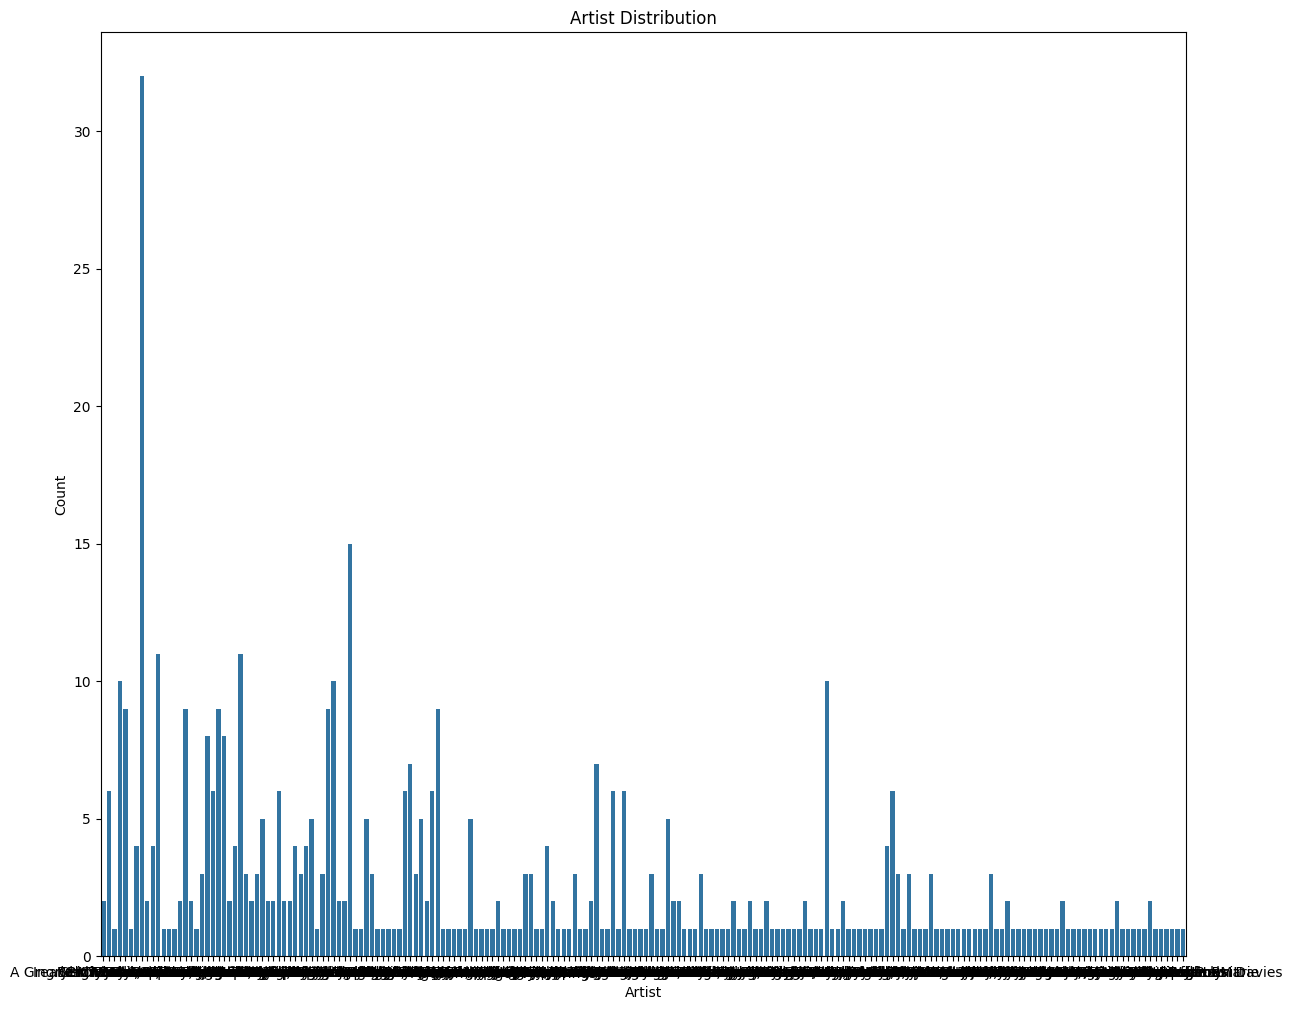

In [ ]:
plt.figure(figsize=(14, 12))
sns.countplot(x='artists', data=df.head(500))
plt.title('Artist Distribution')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()


**SCATTER PLOT**

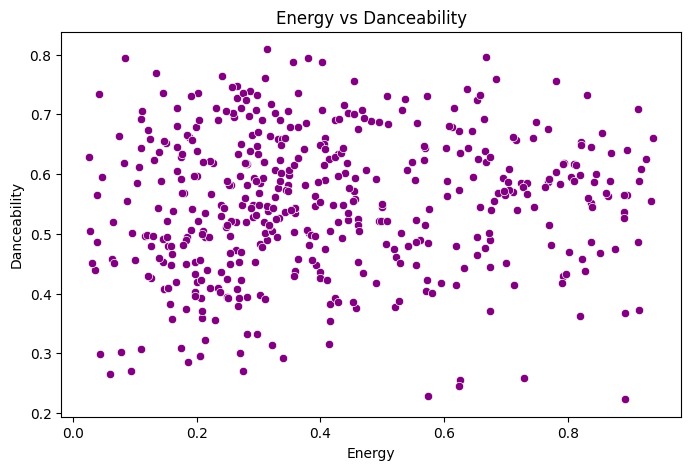

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='energy', y='danceability', data=df.head(500), color='purple')
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()


HEAT MAP

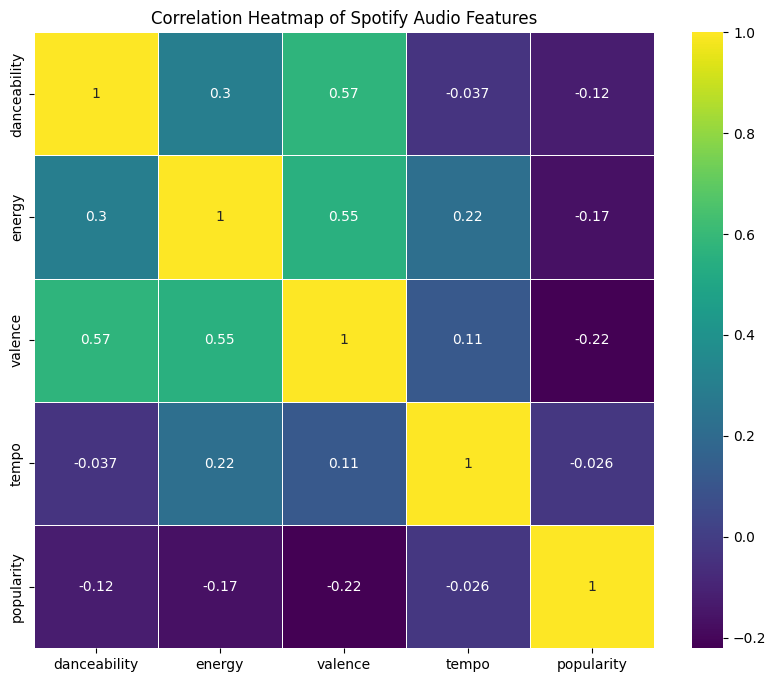

In [ ]:
# Select relevant audio features for correlation
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Compute the correlation matrix
corr_matrix = df.head(6000)[audio_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Spotify Audio Features')
plt.show()

**Perform Basic Data Visualizations**

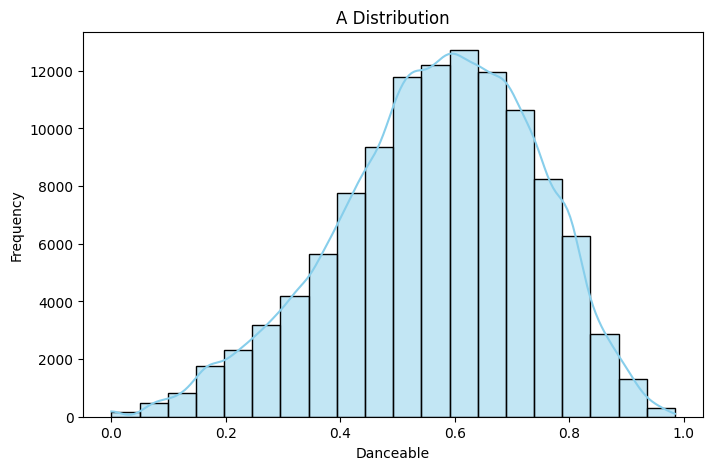

In [ ]:
#Visualize the distribution of a numeric column (e.g., danceability) HISTOGRAM
plt.figure(figsize=(8, 5))
sns.histplot(df['danceability'], bins=20, kde=True, color='skyblue')
plt.title('A Distribution')
plt.xlabel('Danceable')
plt.ylabel('Frequency')
plt.show()


Durations of Songs

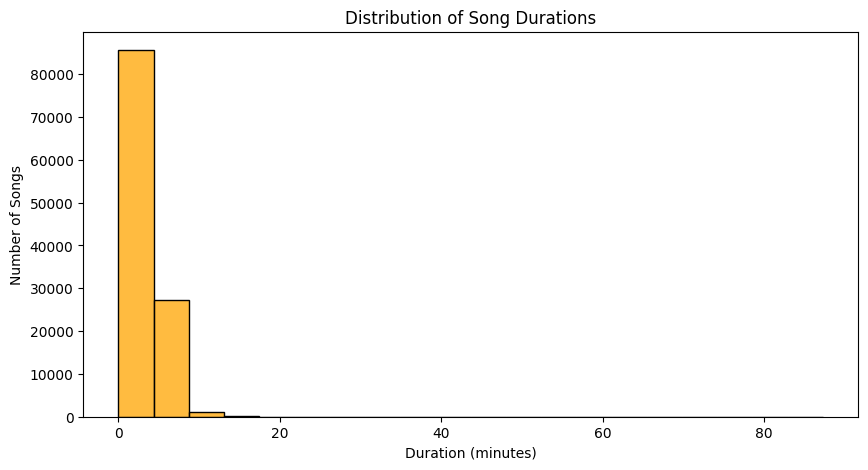

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_ms'] / 60000, bins=20, color='orange')  # Convert milliseconds to minutes
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Songs')
plt.show()

**Popularity Trends Over Time**

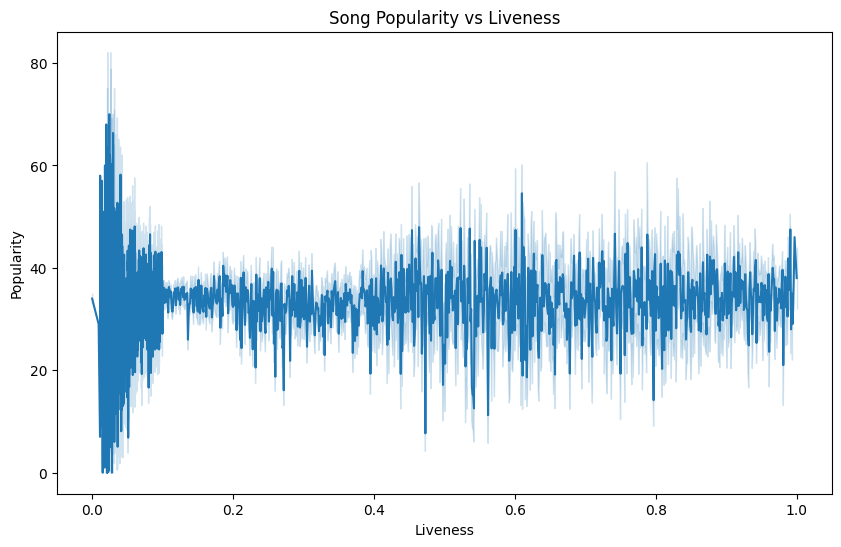

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='liveness', y='popularity')
plt.title('Song Popularity vs Liveness')
plt.xlabel('Liveness')
plt.ylabel('Popularity')
plt.show()

Show the top artists based on the average popularity of their songs

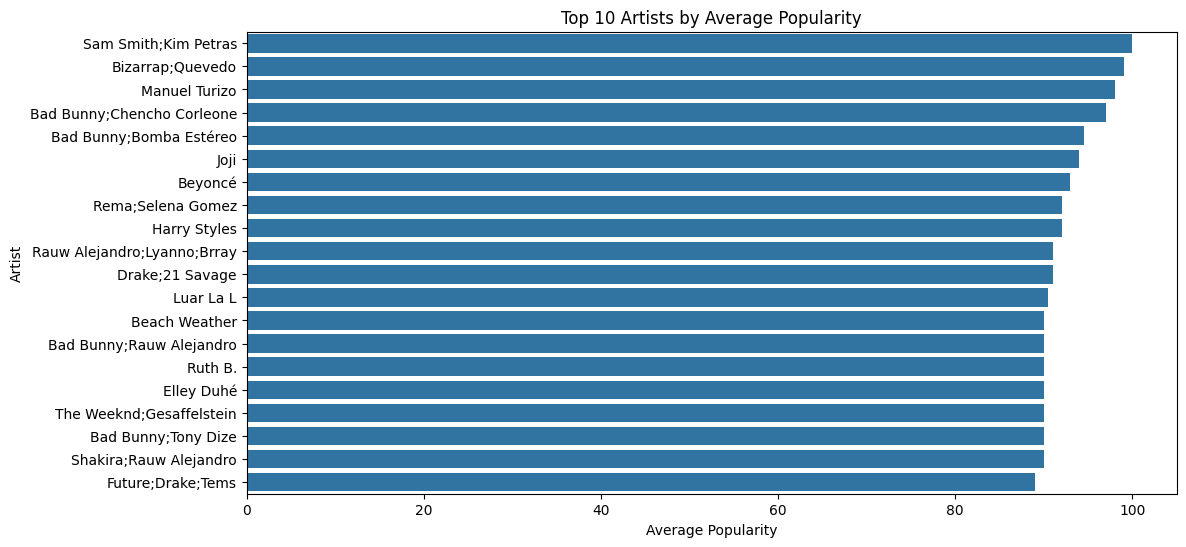

In [ ]:
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()

Predicting Song Popularity - 1) Using regression models to predict popularity based on audio features. (UNIT IV)
